In [10]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from ipykernel import kernelapp as app

In [11]:
train_ann_file = '../../datasets/coco2017/annotations/person_keypoints_train2017.json'
val_ann_file = '../../datasets/coco2017/annotations/person_keypoints_val2017.json'
train_images = '../../datasets/coco2017/train2017/'
test_images = '../../datasets/coco2017/test2017/'
val_images = '../../datasets/coco2017/val2017/'

In [12]:
coco_train = COCO(train_ann_file)
#coco_val = COCO(val_ann_file)

loading annotations into memory...
Done (t=16.77s)
creating index...
index created!


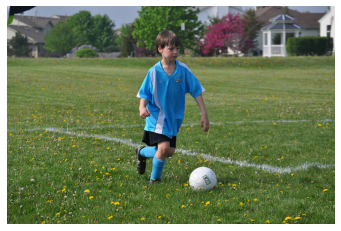

In [20]:
catIds = coco_train.getCatIds(catNms=['person'])
imgIds = coco_train.getImgIds(catIds=catIds)
img = coco_train.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

img_path = train_images + img['file_name']
orig_width = img['width']
orig_height = img['height']
new_width = 320
new_height = 240

I = Image.open(img_path)
plt.axis('off')
plt.imshow(I)
plt.show()

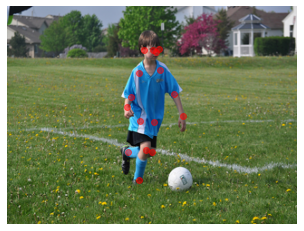

In [22]:
I = I.resize((new_width, new_height))
I = np.asarray(I) / 255.0


plt.imshow(I); plt.axis('off')
ax = plt.gca()

for ann in anns:
    kps = ann['keypoints']
    xs = np.array([kps[x] for x in range(0,len(kps), 3)]) / orig_width * new_width
    ys = np.array([kps[y] for y in range(1,len(kps), 3)]) / orig_height * new_height
    vs = np.array([kps[v] for v in range(2,len(kps), 3)])
    plt.plot(xs[vs>0], ys[vs>0], 'ro', alpha=0.5)

plt.show()